In [ ]:
// --------------------------------------------------------------------------------------------------
// #EE569 Homework Assignment #4
// #Date: March 19, 2019
// #Name: Suchismita Sahu
// #ID: 7688176370
// #email: suchisms@usc.edu
// --------------------------------------------------------------------------------------------------

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import glob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [37]:
length = 510
width = 510

In [38]:
def read_raw(filename, length, width):
    input_raw_image = open(filename,'rb').read()
    input_raw_image = np.frombuffer(input_raw_image, np.uint8).copy()
    img = input_raw_image[0 : length*width]
    img = np.reshape(img, (length,width))
    return img

In [39]:
def convolution(i,j,kernel,image):
    pixel = 0.0;
    for k in range(i,i+5):
        for l in range(j,j+5):
            pixel += (image[k][l] * kernel[k-i][l-j])
    return pixel;

In [40]:
filters = [np.array([1,4,6,4,1]).reshape(1,5),
           np.array([-1,-2,0,2,1]).reshape(1,5),
           np.array([-1,0,2,0,-1]).reshape(1,5),
           np.array([-1,2,0,-2,1]).reshape(1,5),
           np.array([1,-4,6,-4,1]).reshape(1,5)]

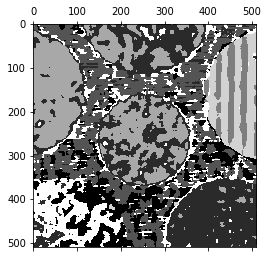

In [41]:
kernels=[]
vectors=[]
for i in range(5):
    for j in range(5):
        kernels.append(np.matmul(np.transpose(filters[i]),filters[j]))

raw_image = read_raw('comb.raw', 510, 510)
img = raw_image - np.mean(raw_image)

img_extended = np.pad(img,2,'reflect')

        #new_img = np.zeros((128,128))
features=[]
filtered_images=[]
for index,kernel in enumerate(kernels):
    filtered_img = np.zeros((510,510))
    for i in range(510):
        for j in range(510):
            filtered_img[i][j] = convolution(i,j,kernel,img_extended)
    
    filtered_images.append(filtered_img)
    
filtered_images_extended=[]
for image in filtered_images:
    Reimage = np.pad(image,6,'reflect')
    filtered_images_extended.append(Reimage)

for a in range(510):
    for b in range(510):
        features=[]
        for Reimage in filtered_images_extended:
            features.append(np.sum(abs(Reimage[a:a+13,b:b+13])-np.mean(Reimage[a:a+13,b:b+13]))/169)
    #features1=[features[0],features[6],features[12],features[18],features[24],features[1]/features[5],features[2]/features[10],features[3]/features[15],features[4]/features[20],features[19]/features[23],features[7]/features[11],features[8]/features[16],features[9]/features[21],features[13]/features[17],features[22]]
        vectors.append(np.array(features))

    #vectors.append(np.array(features))

vectors = np.array(vectors)
vectors = vectors[:,1:]

vectors = (vectors - np.mean(vectors,axis=0))/np.std(vectors,axis=0)

#pca = PCA(n_components = 3)
#vectors_ = pca.fit_transform(vectors)

#fig = plt.figure()
#ax = fig.add_subplot(111,projection='3d')
#ax.scatter(vectors_[:,0],vectors_[:,1],vectors_[:,2])
#plt.show

kmeans = KMeans(n_clusters = 7).fit(vectors)
final = kmeans.labels_.reshape(510,510)
for i in range(510):
    for j in range(510):
        if final[i][j]==1:
            final[i][j] = 42
        elif final[i][j]==2:
            final[i][j] = 84
        elif final[i][j]==3:
            final[i][j] = 126
        elif final[i][j]==4:
            final[i][j] = 168
        elif final[i][j]==5:
            final[i][j] = 210
        elif final[i][j]==6:
            final[i][j] = 255
final = np.uint8(final)

plt.matshow(final,cmap='gray')